<h2><center>Deep Learning for Time Series Forecasting</center></h2>



### All the works references: 

### Making Features of out of Date Column: this gives us potentially a lot of features that can be later verified for information content and then exploited by learning algorithm

### inspiration for feature extraction was taken from following sources : 
https://www.kaggle.com/adityaecdrid/my-first-time-series-comp-added-prophet

https://www.kaggle.com/judesen/store-item-demand

https://www.kaggle.com/thexyzt/keeping-it-simple-by-xyzt

https://www.kaggle.com/darshanadiga/time-series-data-exploration

https://www.kaggle.com/arindamgot/eda-prophet-mlp-neural-network-forecasting

https://www.kaggle.com/poiupoiu/how-to-use-sarimax




#### Although ARIMA is a standard approach to such time series forecasting models however, it is dropper because ARIMA needs to be run on each time series, since we have 500 store/item combinations, it needs to run 500 times. Every time we want to forecast the future, say on Jan 2, 2018, we want to forecast next 90 days. Such a problem with ARIMA is also explained in the sources above. 






In [5]:

# data processing libraries
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
import datetime

# Visualization libaries
import seaborn as sns

############################ matplotlib 3.1.0 or older###############
import matplotlib.pyplot as plt
%matplotlib inline
############################ matplotlib 3.1.0 or older###############

# Machine Learning
#import xgboost as xgb
import math


### Loading data

In [10]:
# Import training and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

#### we need to see what the loaded data looks like

In [7]:
display(train)
display(test)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


## Feature Extraction  

### Making Features of out of Date Column: this gives us potentially a lot of features that can be later verified for information content and then exploited by learning algorithm

### inspiration for feature extraction was taken from : 
https://www.kaggle.com/adityaecdrid/my-first-time-series-comp-added-prophet

https://www.kaggle.com/judesen/store-item-demand


The Kernel(notebook) at the above outlines some of the most important features of the dataset using feature extraction


However, one feature which in my opinion might have an effect on sales was left out and this feature is "Week of the Month"

In [8]:
# Define column date as datatype date and define new date features
for dataset in combine:
    
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset['year'] = dataset.date.dt.year
    dataset['month'] = dataset.date.dt.month
    dataset['day'] = dataset.date.dt.day
    dataset['dayofyear'] = dataset.date.dt.dayofyear
    dataset['dayofweek'] = dataset.date.dt.dayofweek
    dataset['weekofyear'] = dataset.date.dt.weekofyear
    dataset['weekofmonth'] = dataset['weekofyear']
    dataset['weekofmonth'] = (dataset.date.dt.day/7) +1
    dataset['weekofmonth'] = dataset['weekofmonth'].apply(np.floor)
    display(dataset)
    # Additional date features
    dataset['log_dayofyear'] = np.log(dataset['dayofyear'])
    dataset['day_power_year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    dataset['day_week_power_year'] = np.log(np.log(dataset['dayofyear'] + 1) * (np.log(dataset['weekofyear'] + 1)) ** (dataset['year'] - 2000))
    
    # Drop date
    dataset.drop('date', axis=1, inplace=True)


,date,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,weekofmonth
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1.0
1,2013-01-02,1,1,11,2013,1,2,2,2,1,1.0
2,2013-01-03,1,1,14,2013,1,3,3,3,1,1.0
3,2013-01-04,1,1,13,2013,1,4,4,4,1,1.0
4,2013-01-05,1,1,10,2013,1,5,5,5,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27,361,2,52,4.0
912996,2017-12-28,10,50,59,2017,12,28,362,3,52,5.0
912997,2017-12-29,10,50,74,2017,12,29,363,4,52,5.0
912998,2017-12-30,10,50,62,2017,12,30,364,5,52,5.0


,id,date,store,item,year,month,day,dayofyear,dayofweek,weekofyear,weekofmonth
0,0,2018-01-01,1,1,2018,1,1,1,0,1,1.0
1,1,2018-01-02,1,1,2018,1,2,2,1,1,1.0
2,2,2018-01-03,1,1,2018,1,3,3,2,1,1.0
3,3,2018-01-04,1,1,2018,1,4,4,3,1,1.0
4,4,2018-01-05,1,1,2018,1,5,5,4,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
44995,44995,2018-03-27,10,50,2018,3,27,86,1,13,4.0
44996,44996,2018-03-28,10,50,2018,3,28,87,2,13,5.0
44997,44997,2018-03-29,10,50,2018,3,29,88,3,13,5.0
44998,44998,2018-03-30,10,50,2018,3,30,89,4,13,5.0


#### Adding more features


In [89]:
# Add features, such as average sales pr. day, average sales pr. month, rolling mean 90 periods
def add_avg(x):
    x['daily_avg']=x.groupby(['item','store','dayofweek'])['sales'].transform('mean')
    x['monthly_avg']=x.groupby(['item','store','month'])['sales'].transform('mean')
    return x
train = add_avg(train).dropna()

daily_avg = train.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
monthly_avg = train.groupby(['item','store','month'])['sales'].mean().reset_index()

def merge(x,y,col,col_name):
    x =pd.merge(x, y, how='left', on=None, left_on=col, right_on=col,
            left_index=False, right_index=False, sort=True,
             copy=True, indicator=False,validate=None)
    x=x.rename(columns={'sales':col_name})
    return x

test = merge(test, daily_avg,['item','store','dayofweek'],'daily_avg')
test = merge(test, monthly_avg,['item','store','month'],'monthly_avg')

### Time period of the train dataset

In [90]:
# Adding rolling mean feature to train
df = train.groupby(['item'])['sales'].rolling(10).mean().reset_index().drop('level_1', axis=1)
train['rolling_mean'] = df['sales']

# Adding last 3 months of rolling mean from training to test data 
# (Doing this and shifting rolling mean 3 months in training data)
rolling_mean_test = train.groupby(['item','store'])['rolling_mean'].tail(90).copy().reset_index().drop('index', axis=1)
test['rolling_mean'] = rolling_mean_test

# Shifting rolling mean 3 months
train['rolling_mean'] = train.groupby(['item'])['rolling_mean'].shift(90)


#### Let's find out what's the time gap between the last day from training set from the last day of the test set, this will be out lag (the amount of day that need to be forecast)

In [91]:
combine = [train, test]
for dataset in combine:
    dataset['item_times_rolling_mean'] = dataset['item'] * dataset['rolling_mean']
    dataset['store_times_rolling_mean'] = dataset['store'] * dataset['rolling_mean']
    dataset['dayofyear_times_rolling_mean'] = dataset['dayofyear'] * dataset['rolling_mean']

### Feature Selection : Another very important part of the task after feature extraction


To explore the time series data first we need to aggregate the sales by day

Article for Feature Selection : https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

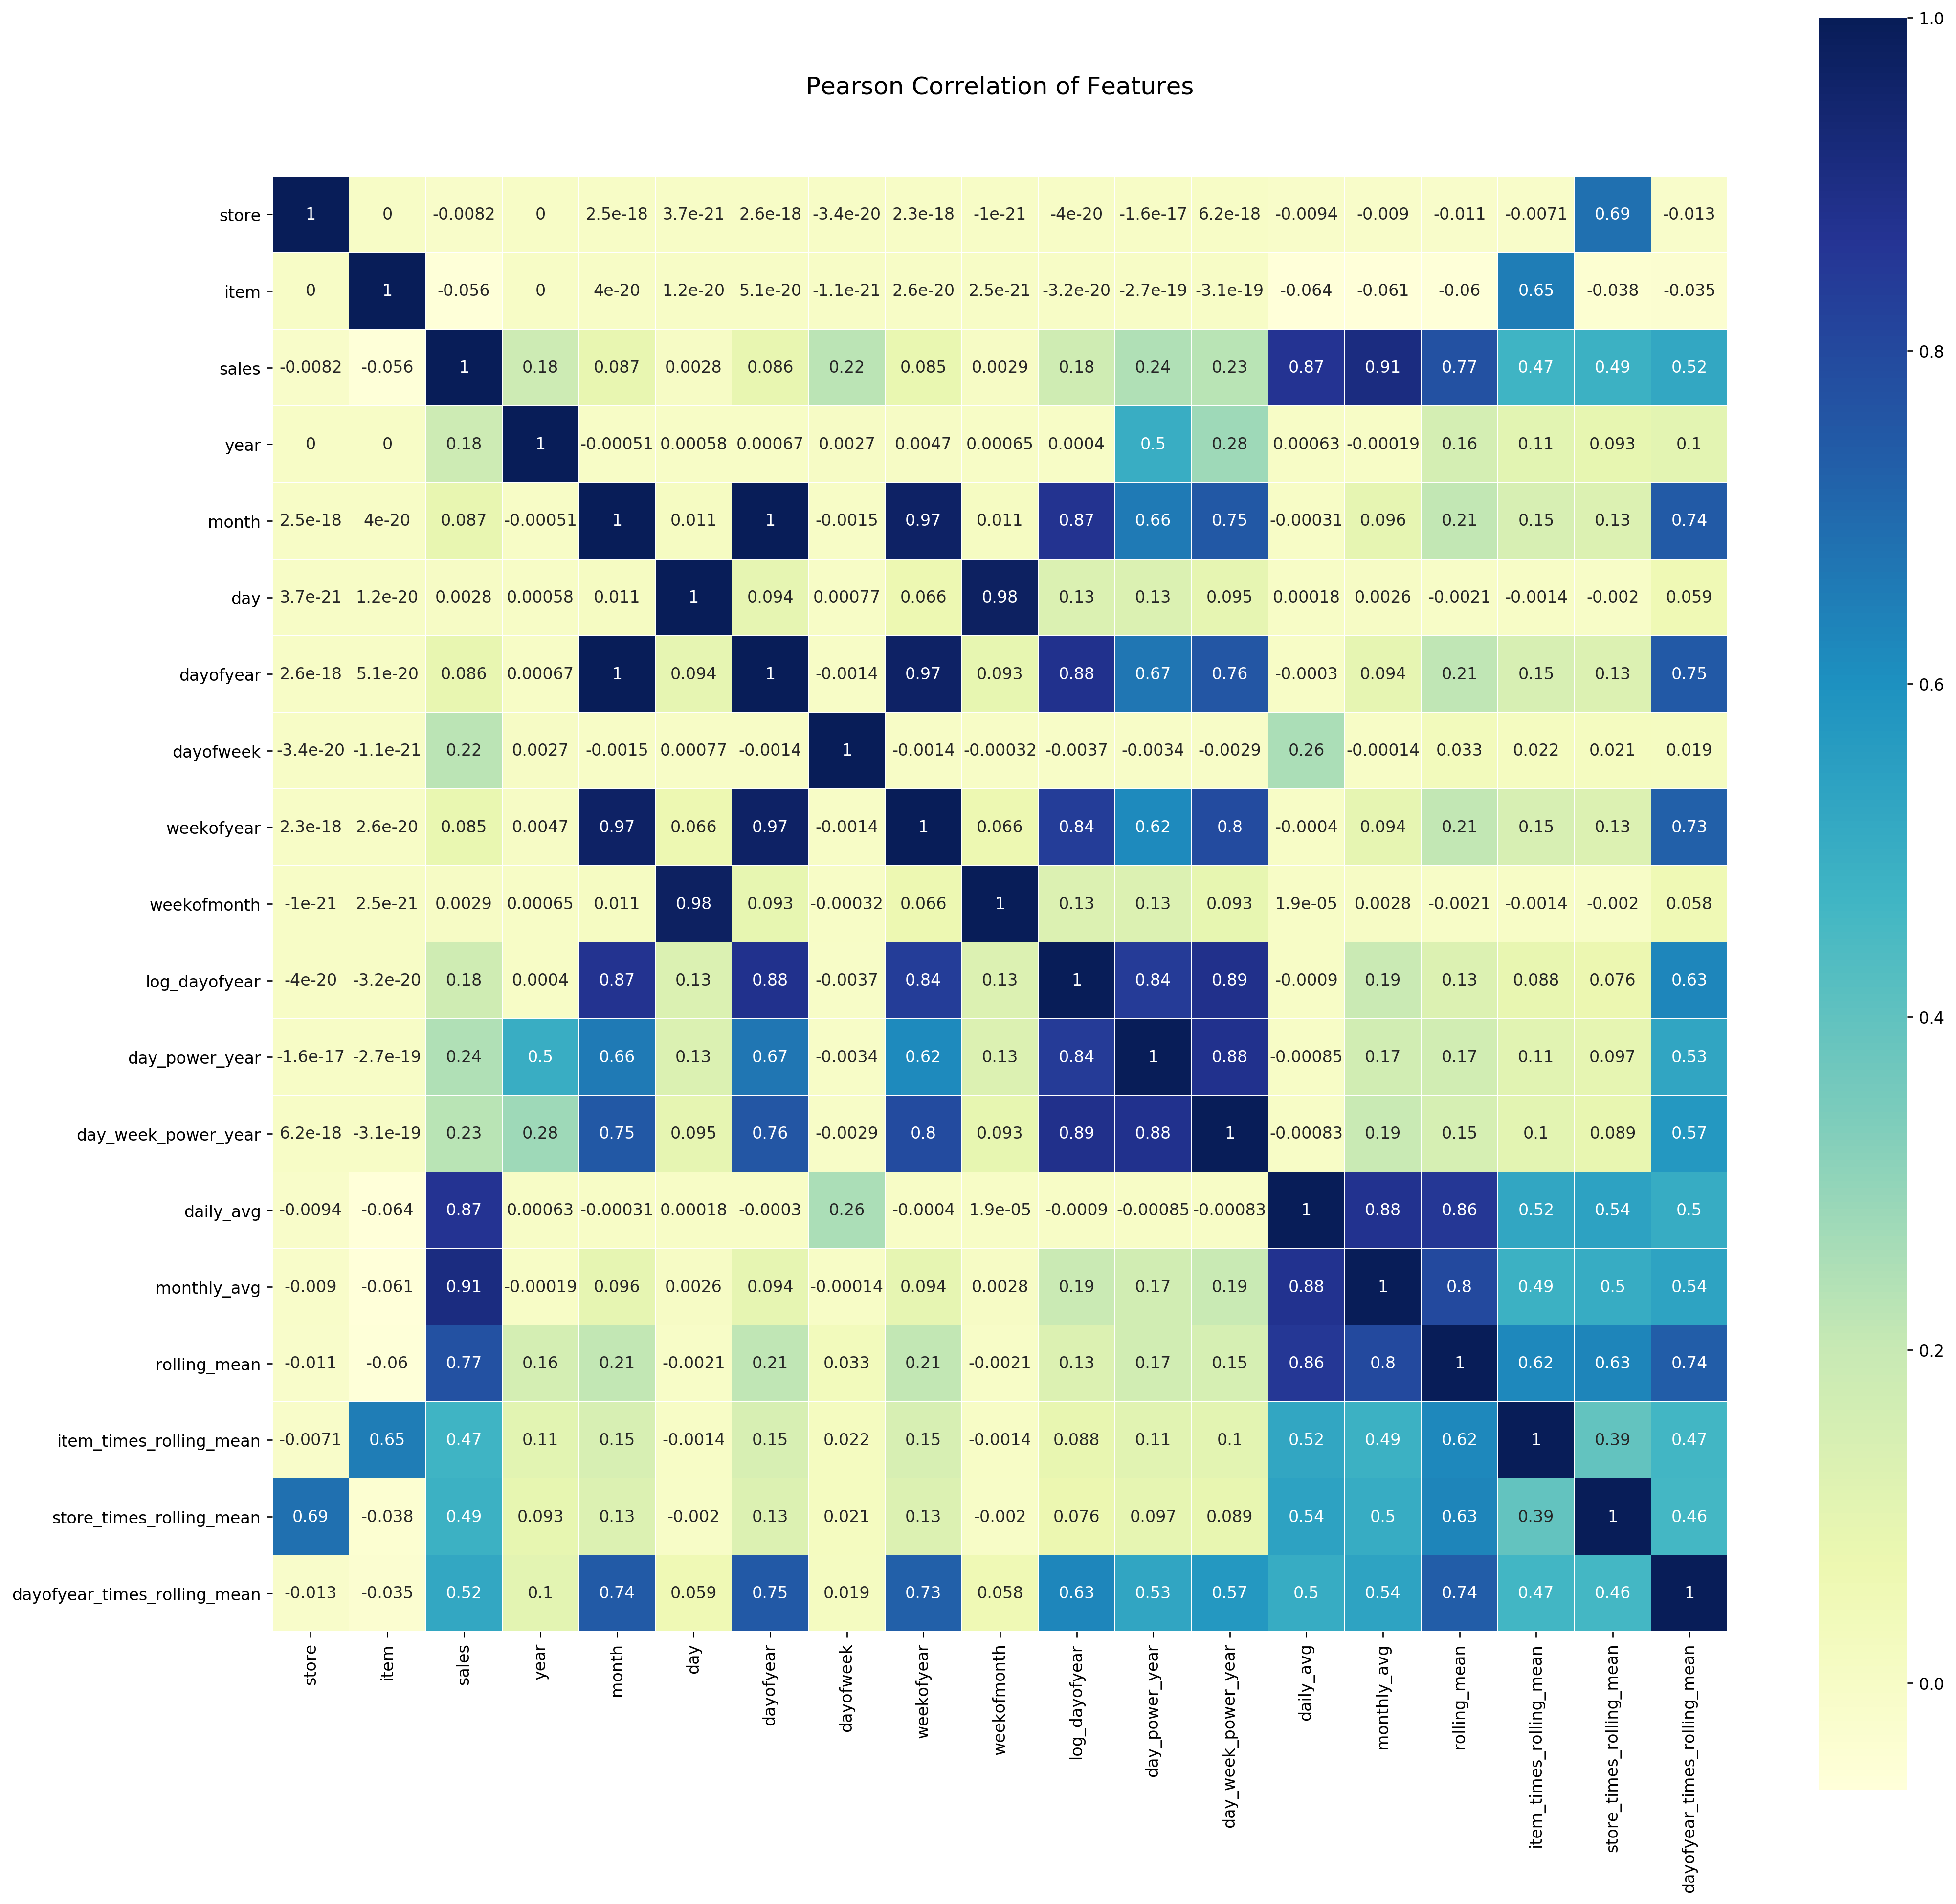

In [92]:
# Pearson Corelation of Features for getting a 
#     basic understanding of relation between features that we have extracted so far


colormap = plt.cm.RdBu
plt.figure(figsize=(20,20),dpi=240)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap="YlGnBu",linecolor='white', annot=True)

### Overall daily sales

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,weekofmonth,log_dayofyear,day_power_year,day_week_power_year,daily_avg,monthly_avg,rolling_mean,item_times_rolling_mean,store_times_rolling_mean,dayofyear_times_rolling_mean
0,1,1,13,2013,1,1,1,1,1,1.0,0.000000,-4.764668,-5.131181,18.168582,13.709677,NaN,NaN,NaN,NaN
1,1,1,11,2013,1,2,2,2,1,1.0,0.693147,1.222622,-4.670620,18.793103,13.709677,NaN,NaN,NaN,NaN
2,1,1,14,2013,1,3,3,3,1,1.0,1.098612,4.246245,-4.438034,19.452107,13.709677,NaN,NaN,NaN,NaN
3,1,1,13,2013,1,4,4,4,1,1.0,1.386294,6.186505,-4.288783,21.015326,13.709677,NaN,NaN,NaN,NaN
4,1,1,10,2013,1,5,5,5,1,1.0,1.609438,7.581575,-4.181470,22.973180,13.709677,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,361,2,52,4.0,5.888878,30.150097,25.213809,68.823755,56.283871,84.2,4210.0,842.0,30396.2
912996,10,50,59,2017,12,28,362,3,52,5.0,5.891644,30.158055,25.214277,73.532567,56.283871,84.8,4240.0,848.0,30697.6
912997,10,50,74,2017,12,29,363,4,52,5.0,5.894403,30.165987,25.214743,78.275862,56.283871,87.9,4395.0,879.0,31907.7
912998,10,50,62,2017,12,30,364,5,52,5.0,5.897154,30.173894,25.215209,82.854406,56.283871,88.9,4445.0,889.0,32359.6


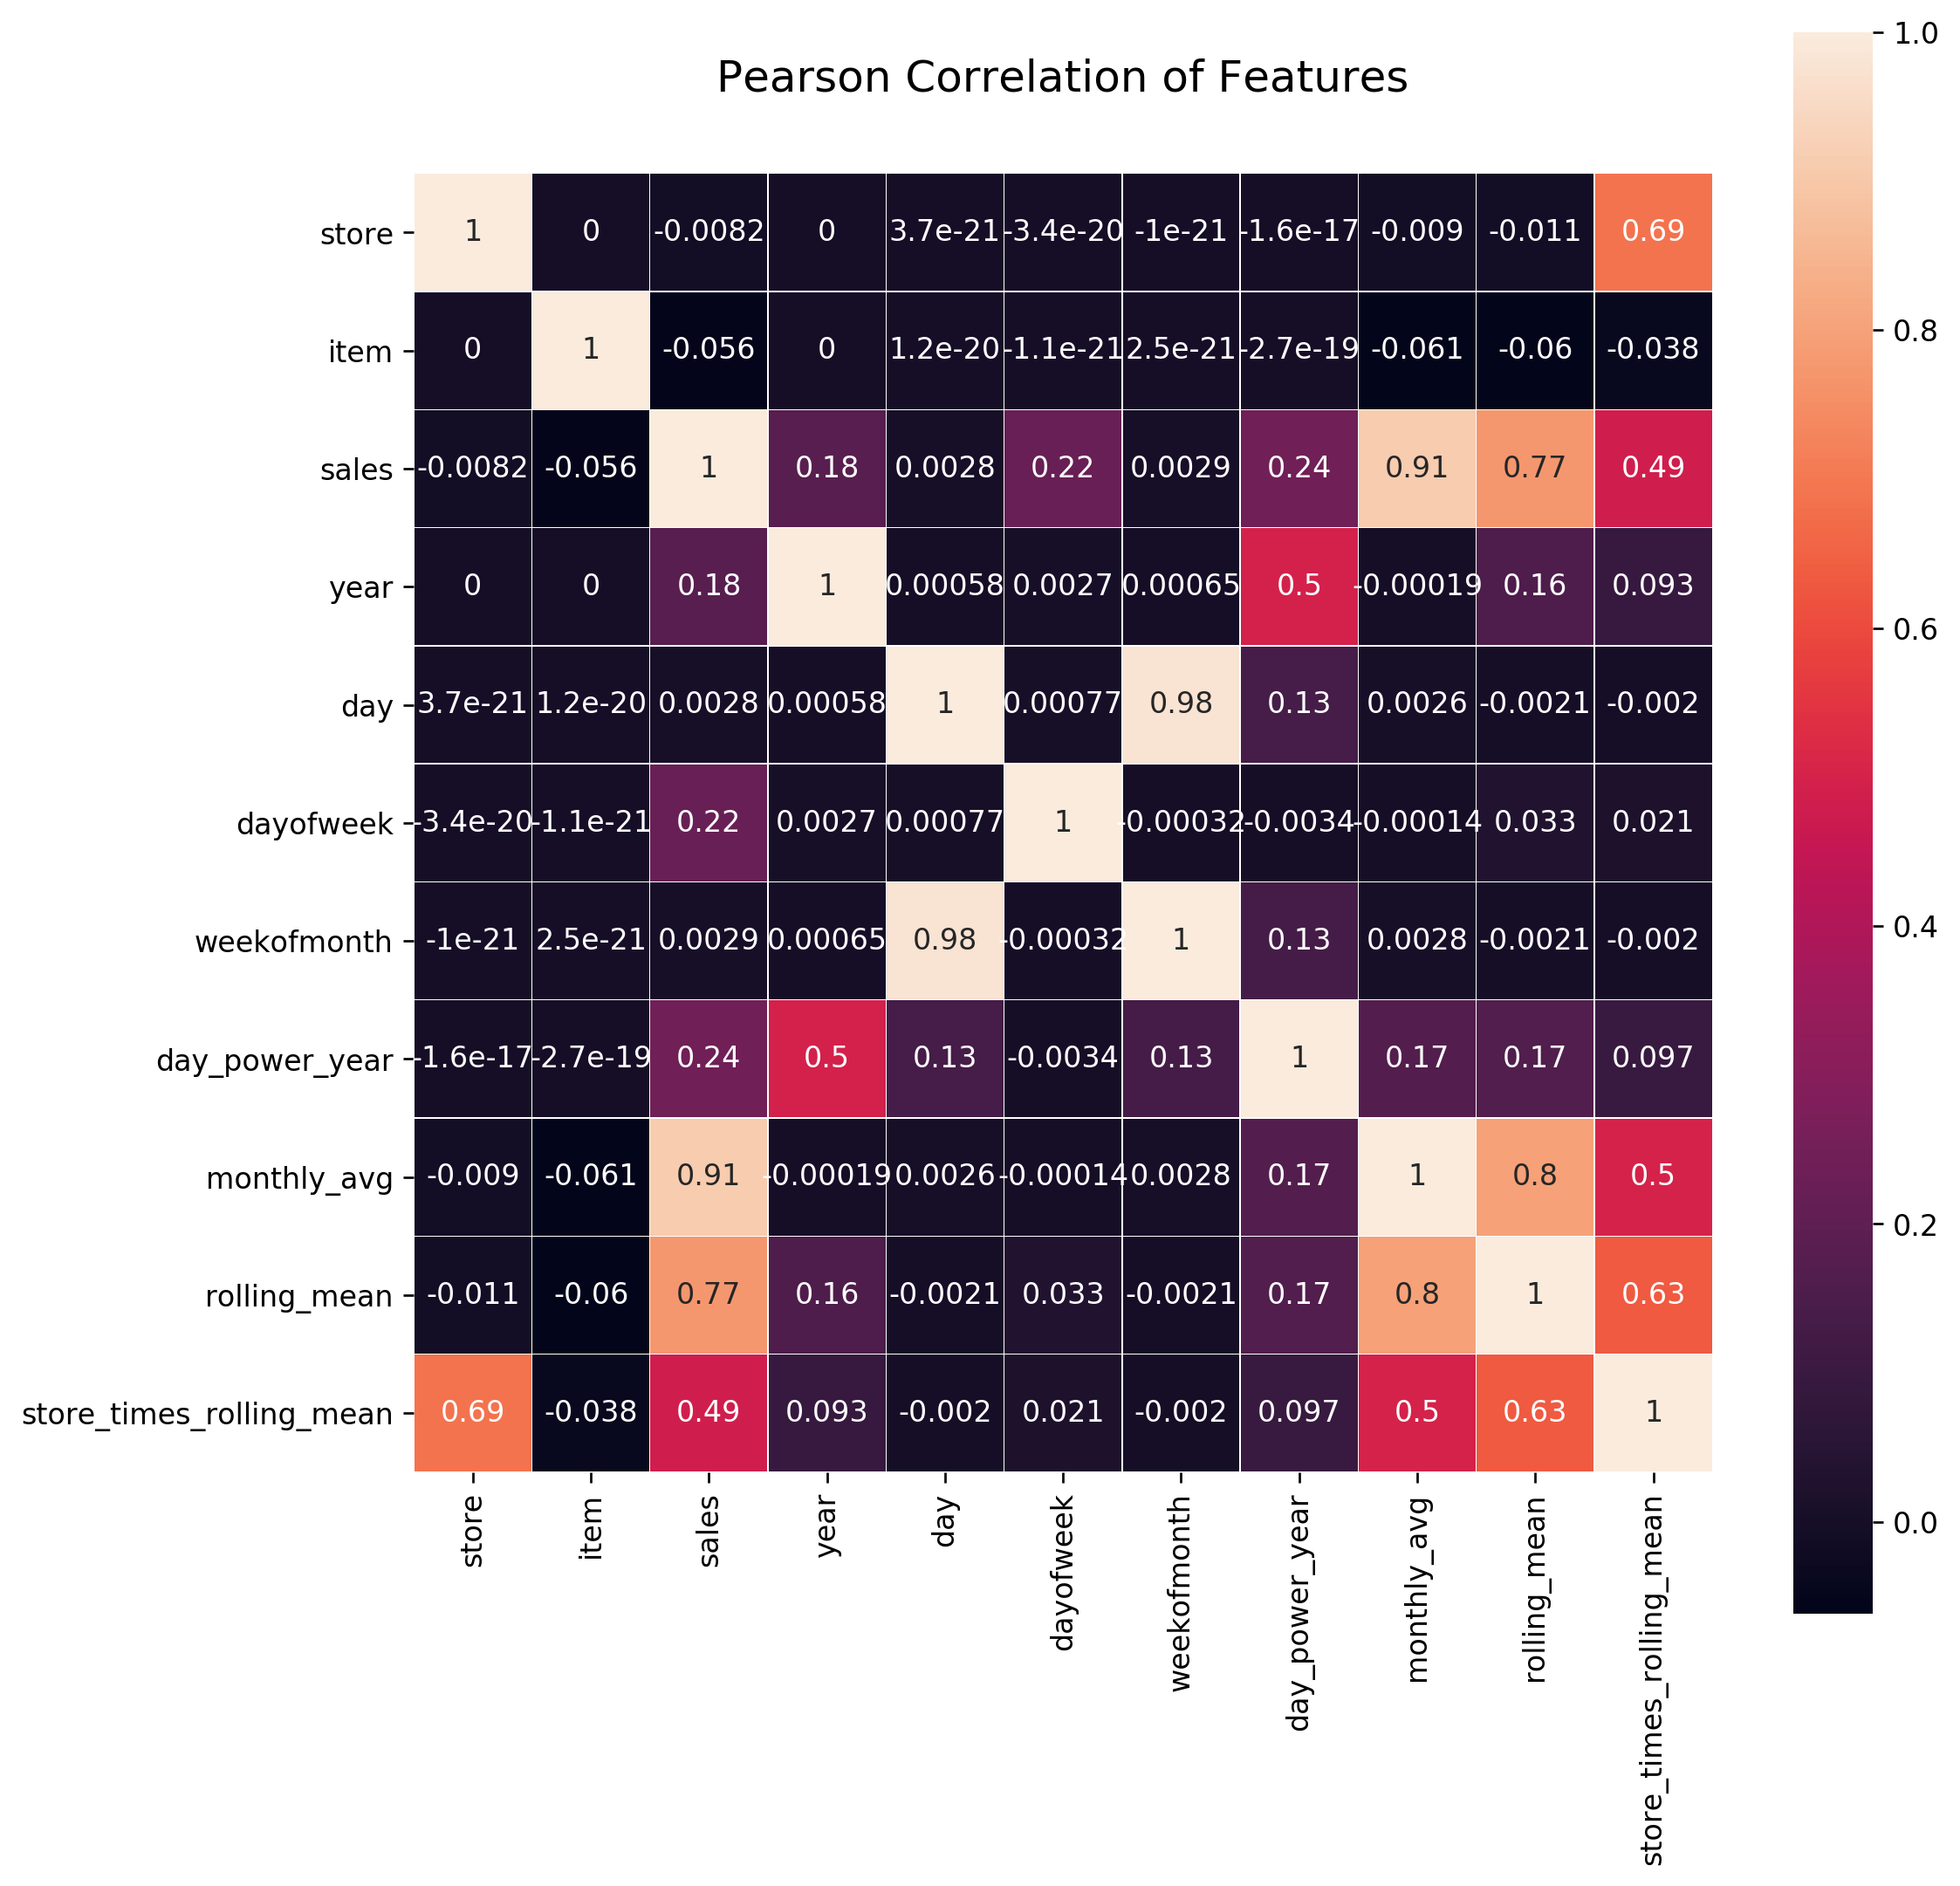

In [93]:
# Seems like dayofyear and weekofyear has high internal correlation and correlates highly with month, so let's drop those.
# All average/mean features also correlated heavily. Since Monthly Average correlates most with sales, we keep this.


#https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e


combine = [train, test]
display(train)
for dataset in combine:
    dataset.drop(['dayofyear', 
                  'weekofyear',
                  'daily_avg',
                  'month',
                  'day_week_power_year',
                  'log_dayofyear',   
                  'dayofyear_times_rolling_mean',        
                  'item_times_rolling_mean'],
                 axis=1, 
                 inplace=True)
    
# Let's check the correlation with all dropped features
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10),dpi=240)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

### Scaling/Normlization for better algorithmic performance AND preparing the training and data set

In [94]:
train.head()
temp_sales = train['sales']
temp_id = test['id']
train = (train - train.mean()) / train.std()
test = (test - test.mean()) / test.std()
train['sales'] = temp_sales
test['id'] = temp_id

x_train = train.drop('sales', axis=1).dropna()
y_train = train['sales']
test.sort_values(by=['id'], inplace=True)
x_test = test.drop('id', axis=1)

x_pred = test.drop('id', axis=1)
df = train

### Preparing and XGB Model

In [95]:
def XGBmodel(x_train,x_test,y_train,y_test):
    
    matrix_train = xgb.DMatrix(x_train,label=y_train)
    matrix_test = xgb.DMatrix(x_test,label=y_test)
    model=xgb.train(params={'objective':'reg:linear','eval_metric':'rmse'}
                    ,dtrain=matrix_train,num_boost_round=500, 
                    early_stopping_rounds=20,evals=[(matrix_test,'test')],)
    return model


### Splitting training and validation Data

In [96]:
x=df.drop('sales',axis=1)
y=df.pop('sales')
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123,test_size=0.2)



### Running the Model

In [97]:
model=XGBmodel(x_train,x_test,y_train,y_test)
y_pred = model.predict(xgb.DMatrix(x_pred), ntree_limit = model.best_ntree_limit)

[23:52:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:42.0069
Will train until test-rmse hasn't improved in 20 rounds.
[1]	test-rmse:29.9851
[2]	test-rmse:21.7167
[3]	test-rmse:16.1453
[4]	test-rmse:12.5039
[5]	test-rmse:10.2233
[6]	test-rmse:8.87342
[7]	test-rmse:8.1182
[8]	test-rmse:7.71285
[9]	test-rmse:7.5004
[10]	test-rmse:7.39109
[11]	test-rmse:7.3346
[12]	test-rmse:7.30431
[13]	test-rmse:7.28707
[14]	test-rmse:7.27879
[15]	test-rmse:7.27306
[16]	test-rmse:7.26964
[17]	test-rmse:7.26752
[18]	test-rmse:7.26583
[19]	test-rmse:7.26416
[20]	test-rmse:7.26364
[21]	test-rmse:7.26298
[22]	test-rmse:7.26242
[23]	test-rmse:7.26248
[24]	test-rmse:7.26257
[25]	test-rmse:7.26307
[26]	test-rmse:7.26255
[27]	test-rmse:7.26238
[28]	test-rmse:7.26228
[29]	test-rmse:7.26205
[30]	test-rmse:7.26146
[31]	test-rmse:7.26134
[32]	test-rmse:7.26164
[33]	test-rmse:7.26171
[34]	test-

### Generating the test prediction: submission.csv

In [98]:
# Add to submission

submission = pd.DataFrame({
        "id": test['id'],
        "sales": y_pred.round()
})

submission.to_csv('submission_Abdul_Wahab.csv',index=False)
submission.to_csv('submission.csv',index=False)

##  Instead of throwing a fancy approach, I tried to keep it simple by first focusing on the feature extraction and then on feature selection. I have been able to acheive a good RMSE using a straightforward XGB boosting technique.